# What, Why and How to Use ECDFS
by John DeJesus

This is the notebook for the [ECDF Youtube Tutorial](https://www.youtube.com/watch?v=fCllDyW9Nn4&t=1s). You may read this on its own or follow along with the video.

## By the end of the tutorial you will be able to:

* Understand what an ecdf is.
* Implement an ecdf with python code.
* Interpret an ecdf




An **Empirical Cumulative Distribution Function** is a step function used to show the distribution of data. It can answer what percentage of the data is under a specific value.

In [1]:
# Load Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
sns.set()

In [2]:
# Load the data from data.world
avocado = pd.read_csv('https://query.data.world/s/qou5hvocejsu4qt4qb2xlndg5ntzbm')

In [3]:
# Preview the data
avocado.head()

,Date,AveragePrice,Total Volume,Small Hass,Large Hass,XL Hass,Total Bags,Small Bags,Large Bags,XLarge Bags,Type,Year,Region
0,27/12/2015,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,20/12/2015,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,13/12/2015,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
3,6/12/2015,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany
4,29/11/2015,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany


In [4]:
# check the info
avocado.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18249 entries, 0 to 18248
Data columns (total 13 columns):
Date            18249 non-null object
AveragePrice    18249 non-null float64
Total Volume    18249 non-null float64
Small Hass      18249 non-null float64
Large Hass      18249 non-null float64
XL Hass         18249 non-null float64
Total Bags      18249 non-null float64
Small Bags      18249 non-null float64
Large Bags      18249 non-null float64
XLarge Bags     18249 non-null float64
Type            18249 non-null object
Year            18249 non-null int64
Region          18249 non-null object
dtypes: float64(9), int64(1), object(3)
memory usage: 1.8+ MB


In [5]:
# Since there is a year column let's see how many years are there.
avocado.Year.unique()

array([2015, 2016, 2017, 2018], dtype=int64)

### Why use ecdfs over histograms?

Histogram can show the distribution of your data also. However you can be tricked by histograms depending on the number of bins you used. See the example below

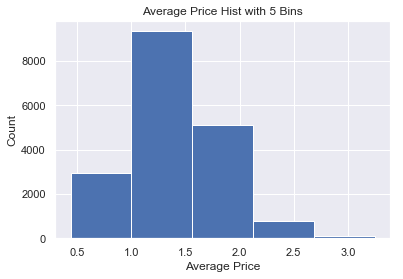

In [6]:
# Looking at the price data as a histogram with 5 bins
plt.hist(avocado.AveragePrice, bins = 5 )
plt.title('Average Price Hist with 5 Bins')
plt.xlabel('Average Price')
plt.ylabel('Count')
plt.show()

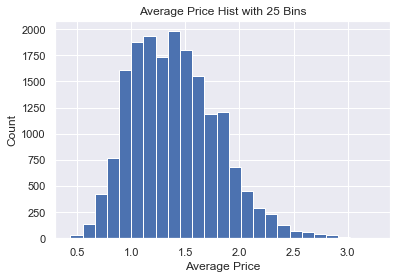

In [7]:
# Looking at the price data as a histogram with 25 bins.
plt.hist(avocado.AveragePrice, bins = 25)
plt.title('Average Price Hist with 25 Bins')
plt.xlabel('Average Price')
plt.ylabel('Count')
plt.show()

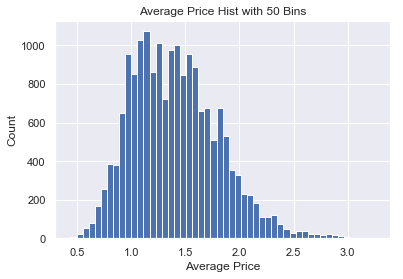

In [8]:
# Looking at the price data as a histogram with 50 bins.
plt.hist(avocado.AveragePrice, bins = 50)
plt.title('Average Price Hist with 50 Bins')
plt.xlabel('Average Price')
plt.ylabel('Count')
plt.show()

Now all of a sudden our data is bimodal with 25 bins instead of unimodal with 5 bins. The bimodal peaks show more when we increase the number of bins.

In [9]:
# Creating our ecdf function
def ecdf(data):
    """ 
    This function creates the x and y axis for a ecdf
    plot given the data as input.
    """
    xaxis = np.sort(data)
    yaxis = np.arange(1,len(data)+1)/len(data)
    return xaxis, yaxis

In [10]:
# Creating the xaxis and yaxis for our ecdf on price
x,y = ecdf(avocado['AveragePrice'])

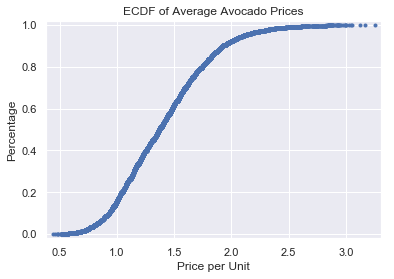

In [11]:
# Plotting our ecdf
plt.plot(x,y,linestyle='none',marker='.')
plt.title('ECDF of Average Avocado Prices')
plt.xlabel('Price per Unit')
plt.ylabel('Percentage')
plt.margins(0.02)
plt.show()

### Recall the normal distribution and how to read it.

![Normal Curve](https://static1.squarespace.com/static/5a0a534ee45a7c76b8a3c476/t/5a9dfbc753450ababdf645aa/1520304051418/gaussian.gif?format=750w)

Gaussian Distribution. Image from etfhq.com

In [12]:
# Create a function for computing and plotting the ECDF with default parameters
def plot_ecdf(data,title = "ECDF Plot", xlabel = 'Data Values', ylabel = 'Percentage'):
    
    """ 
    Function to plot ecdf taking a column of data as input.
    """
    xaxis = np.sort(data)
    yaxis = np.arange(1, len(data)+1)/len(data)
    plt.plot(xaxis,yaxis,linestyle='none',marker='.')
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.margins(0.02)
  

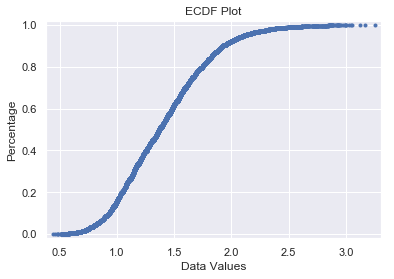

In [13]:
# Creating the same plot with our ecdf function
plot_ecdf(avocado['AveragePrice'])
plt.show()

### Information we can get from our ECDF

1. 20% of the avocados had a price of about 1 dollar or less.
2. About 90% of the avocados had a price of 2 dollars or less

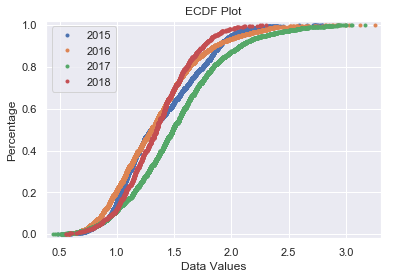

In [14]:
# plotting multiple may be difficult to read.

# set a variable for years
years = avocado.Year.unique()

# plot all years of the 
for year in years:
    plot_ecdf(avocado['AveragePrice'][avocado.Year == year])
plt.legend(labels=years)
plt.show()

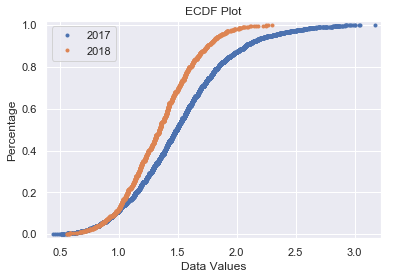

In [15]:
# Sometimes less is more

plot_ecdf(avocado['AveragePrice'][avocado.Year == 2017])
plot_ecdf(avocado['AveragePrice'][avocado.Year == 2018])
plt.legend(labels=years[-2:])
plt.show()

### Info we can obtain from our ECDF

1. Average Prices of avocados overall were less in 2018 versus 2017.
2. The maximum average price of avocados was less than 2.50 in 2018.
3. The minimum average price of avocadoes was less in 2017 versus 2018.

# Practice Exercises

* Plot an ecdf using the other numeric columns in this data set.
* Plot the ecdfs of a numeric column with conditions.
* Plot ecdfs of your own data.
* Practice interpreting the charts.


# Summary

* ECDFs are used to show the distribution of your data.
* The advantage over histograms is that they are immune to binning bias.
* You can read them similarily to a normal distribution.


# Thanks for watching/reading! Let me know if you found this helpful.

* [Video Tutorial](https://www.youtube.com/watch?v=fCllDyW9Nn4&t=1s)
* [GitHub](http://github.com/johndeJesus22)
* [Twitter](https://twitter.com/johnnydata22)
* [LinkedIn](https://www.linkedin.com/in/jdejesus22/)
